## Skrypt uzupełniający braki danych w otrzymanym pliku

1) Wczytanie

In [1]:
import pandas as pd

df = pd.read_csv("dane-zeliwo.csv")
del df['Unnamed: 0']
df.head()

,Nr źródła,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],Mo [%],...,A5 [%],Twardość Brinella [HB],Twardość Rockwella [HRC],Twardość Rockwella [HRA],Twardość Rockwella [HRB],Twardość Vickersa [HV],Udarność Charpy [J],Temperatura pomiaru udarności [˚C],Udział austenitu %,Martensite volume fraction Xα'
0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,NaN
1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN
2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN
3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN
4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1441 non-null float64
Si [%]                                      1441 non-null float64
S [%]                                       1377 non-null float64
P [%]                                       1362 non-null float64
Mg [%]                                      1278 non-null float64
Mn [%]                                      1402 non-null float64
Ni [%]                                      1261 non-null float64
Cu [%]                                      1225 non-null float64
Mo [%]                                      1062 non-null float64
Cr [%]                                      475 non-null float64
Al [%]                                      413 non-null float64
Sn [%]                                      410 non-null float64
B [%]                                  

2) Uzupełnienie braków danych

* kolumny C, Si, S, P, Mg, Mn, Ni - te pierwiastki w składzie chemicznym muszą być (zgodnie z notatkami), nie można ich uzupełnić wartością $0$, więc każda z nich zostanie uzupełniona medianą

In [3]:
pierwiastki = ['C', 'Si', 'S', 'P', 'Mg', 'Mn', 'Ni']
pierwiastki_procent = [p + ' [%]' for p in pierwiastki]
df.loc[:,pierwiastki_procent] = df.loc[
    :,pierwiastki_procent].fillna(df.loc[:,pierwiastki_procent
                                        ].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1225 non-null float64
Mo [%]                                      1062 non-null float64
Cr [%]                                      475 non-null float64
Al [%]                                      413 non-null float64
Sn [%]                                      410 non-null float64
B [%]                                  

* zgodnie z notatkami Cu, Mo, Cr, Al, Sn, B, V - te pierwiastki występują w śladowych ilościach - roboczo uzupełnie braki wartością $0$

In [4]:
pierwiastki2 = ['Cu', 'Cr', 'Mo', 'Al', 'Sn', 'B', 'V']
pierwiastki_procent2 = [p + ' [%]' for p in pierwiastki2]
df.loc[:,pierwiastki_procent2] = df.loc[:,pierwiastki_procent2].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                      1508 non-null float64
B [%]                               

* kolumny Udział perlitu [%] oraz Udział ferrytu [%] powinny się sumować do 100%, więc zrobię to, przy okazji uzupełniając dane

In [5]:
perlit = 'Udział perlitu [%]'
ferryt = 'Udział ferrytu [%]'

df.loc[(df[perlit].isna()) & (~df[ferryt].isna()),[perlit]] = 100 - df.loc[
    (df[perlit].isna()) & (~df[ferryt].isna()),[ferryt]]

df.loc[(df[ferryt].isna()) & (~df[perlit].isna()),[ferryt]] = 100 - df.loc[
    (df[ferryt].isna()) & (~df[perlit].isna()),[perlit]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                      1508 non-null float64
B [%]                               

Nie uzupełniło to braków :(

* Kolumny
    
    Rm [MPa] (as cast)
    
    A5 [%]     (as cast)
    
Te kolumny można uzupełnić na podstawie składu chemicznego, więc to zrobie.

### Rm [Mpa] (as cast) :

In [7]:
y = df.loc[~df['Rm [MPa] (as cast)'].isna(),:]['Rm [MPa] (as cast)']
X = df.loc[~df['Rm [MPa] (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X.shape

(204, 14)

Jako, że pełnych obserwacji jest mało (204), to do oceny modelu uzupełniającego użyję cross walidacji (10-krotnej).

In [8]:
# modele
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# metryki
from sklearn import metrics

# CV
from sklearn.model_selection import cross_val_score

metryka = 'neg_mean_absolute_error'
rf = RandomForestRegressor(n_estimators=500,criterion = 'mae')
lm = LinearRegression()
lasso = Lasso()


score = pd.DataFrame({
    "rf_score" : cross_val_score(rf, X, y, cv=10, scoring=metryka),
    "lm_score" : cross_val_score(lm, X, y, cv=10, scoring=metryka),
    "lasso_score" : cross_val_score(lasso, X, y, cv=10, scoring=metryka)
})


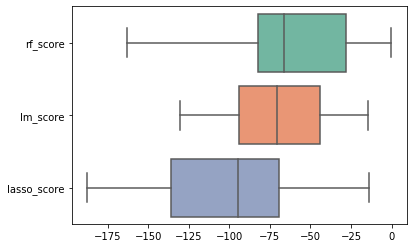

In [10]:
import seaborn as sns
ax = sns.boxplot(data=score, orient="h", palette="Set2")

Więc do uzupelnienia wybiore las losowy: 
* większa mediana
* może osiągać praktycznie zerowy błąd predykcji

Uzupełnienie:

In [11]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [12]:
X_do_uzupelnienia = df.loc[df['Rm [MPa] (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X_do_uzupelnienia.shape

(1304, 14)

In [13]:
df.loc[df['Rm [MPa] (as cast)'].isna(),['Rm [MPa] (as cast)']] = rf.predict(
    X_do_uzupelnienia)

### Kolumna A5 [%]     (as cast)

In [14]:
y = df.loc[~df['A5 [%]     (as cast)'].isna(),:]['A5 [%]     (as cast)']
X = df.loc[~df['A5 [%]     (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X.shape

(172, 14)

Jeszcze mniej obserwacji więc ponownie będzie to cross walidacja

In [15]:
metryka = 'neg_mean_absolute_error'
rf = RandomForestRegressor(n_estimators=500, criterion = 'mae')
lm = LinearRegression()
lasso = Lasso()


score = pd.DataFrame({
    "rf_score" : cross_val_score(rf, X, y, cv=10, scoring=metryka),
    "lm_score" : cross_val_score(lm, X, y, cv=10, scoring=metryka),
    "lasso_score" : cross_val_score(lasso, X, y, cv=10, scoring=metryka)
})

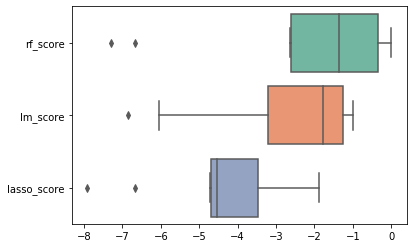

In [17]:
ax = sns.boxplot(data=score, orient="h", palette="Set2")

Ponownie uzupelnie braki przy pomocy lasu:
* są obserwacje dla których sie nie myli
* wyższa mediana

In [18]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
X_do_uzupelnienia = df.loc[df['A5 [%]     (as cast)'].isna(),
           pierwiastki_procent + pierwiastki_procent2]
X_do_uzupelnienia.shape

(1336, 14)

In [20]:
df.loc[df['A5 [%]     (as cast)'].isna(),['A5 [%]     (as cast)']
      ] = rf.predict(X_do_uzupelnienia)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                      1508 non-null float64
B [%]                               

### Zapis tak uzupełnionych danych:

In [23]:
df.to_csv("dane-zeliwo-uzupelnienie.csv")

Sprawdzenie

In [26]:
df_uzup = pd.read_csv("dane-zeliwo-uzupelnienie.csv")
df_uzup.head()

,Unnamed: 0,Nr źródła,C [%],Si [%],S [%],P [%],Mg [%],Mn [%],Ni [%],Cu [%],...,A5 [%],Twardość Brinella [HB],Twardość Rockwella [HRC],Twardość Rockwella [HRA],Twardość Rockwella [HRB],Twardość Vickersa [HV],Udarność Charpy [J],Temperatura pomiaru udarności [˚C],Udział austenitu %,Martensite volume fraction Xα'
0,0,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,NaN
1,1,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN
2,2,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,...,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN
3,3,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,...,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN
4,4,1,3.4,2.41,0.017,0.015,0.064,0.15,0.001,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.2,NaN


In [27]:
df_uzup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 42 columns):
Unnamed: 0                                  1508 non-null int64
Nr źródła                                   1505 non-null object
C [%]                                       1508 non-null float64
Si [%]                                      1508 non-null float64
S [%]                                       1508 non-null float64
P [%]                                       1508 non-null float64
Mg [%]                                      1508 non-null float64
Mn [%]                                      1508 non-null float64
Ni [%]                                      1508 non-null float64
Cu [%]                                      1508 non-null float64
Mo [%]                                      1508 non-null float64
Cr [%]                                      1508 non-null float64
Al [%]                                      1508 non-null float64
Sn [%]                                

## Do zrobienia:

Uzupełnienie reszty kolumn